In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Dataframes/df_minus_quito.csv')
df = data.copy()

In [4]:
df.head()

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday,local_holiday,regional_holiday
0,66,2013-01-01,11,AUTOMOTIVE,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
1,67,2013-01-01,11,BABY CARE,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
2,68,2013-01-01,11,BEAUTY,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
3,69,2013-01-01,11,BEVERAGES,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0
4,70,2013-01-01,11,BOOKS,0.0,0,Cayambe,Pichincha,B,6,93.14,1,1,0


In [5]:
df['state'].value_counts()

Guayas                            611292
Santo Domingo de los Tsachilas    166716
Azuay                             166716
Manabi                            166716
Cotopaxi                          111144
Tungurahua                        111144
Los Rios                          111144
El Oro                            111144
Pichincha                          55572
Chimborazo                         55572
Imbabura                           55572
Bolivar                            55572
Pastaza                            55572
Santa Elena                        55572
Loja                               55572
Esmeraldas                         55572
Name: state, dtype: int64

In [38]:
daily_sales = df.groupby('date').agg({'sales': 'sum', 'onpromotion': 'mean', 'dcoilwtico': 'mean','national_holiday': 'mean'}).reset_index().round(3)
daily_sales['date'] = pd.to_datetime(daily_sales['date'])
daily_sales.set_index('date')

,sales,onpromotion,dcoilwtico,national_holiday
date,,,,
2013-01-01,2511.619,0.000,93.14,1.0
2013-01-02,218693.044,0.000,93.14,0.0
2013-01-03,170227.868,0.000,92.97,0.0
2013-01-04,163540.909,0.000,93.12,0.0
2013-01-05,211890.750,0.000,93.20,1.0
...,...,...,...,...
2017-08-11,438967.991,7.232,48.81,1.0
2017-08-12,419841.459,4.548,47.59,0.0
2017-08-13,445465.409,5.223,47.59,0.0


date                datetime64[ns]
sales                      float64
onpromotion                float64
dcoilwtico                 float64
national_holiday           float64
dtype: object

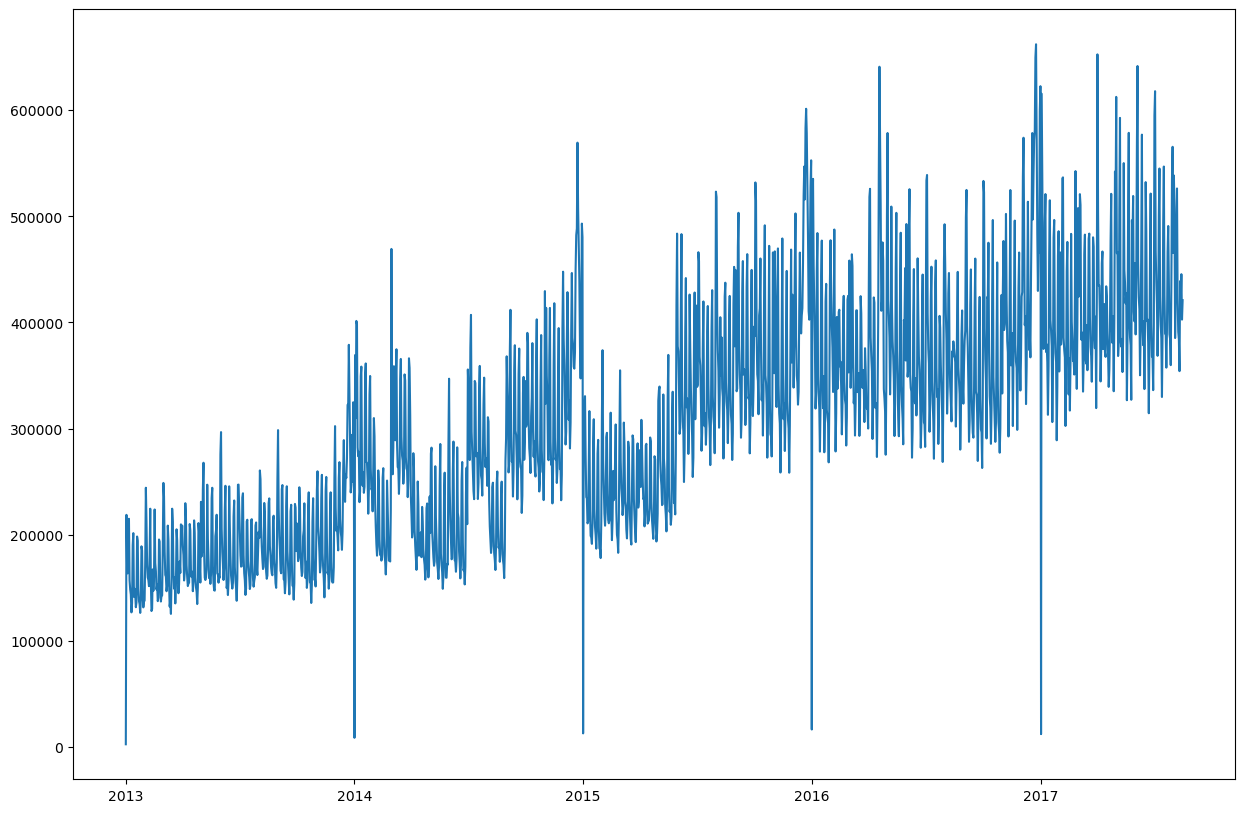

In [41]:
plt.figure(figsize=(15,10))
plt.plot(daily_sales['date'],daily_sales['sales'])

C:\Users\bcspr\AppData\Local\Temp\ipykernel_21548\2269421805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = daily_sales.corr(),annot= True)


<Axes: >

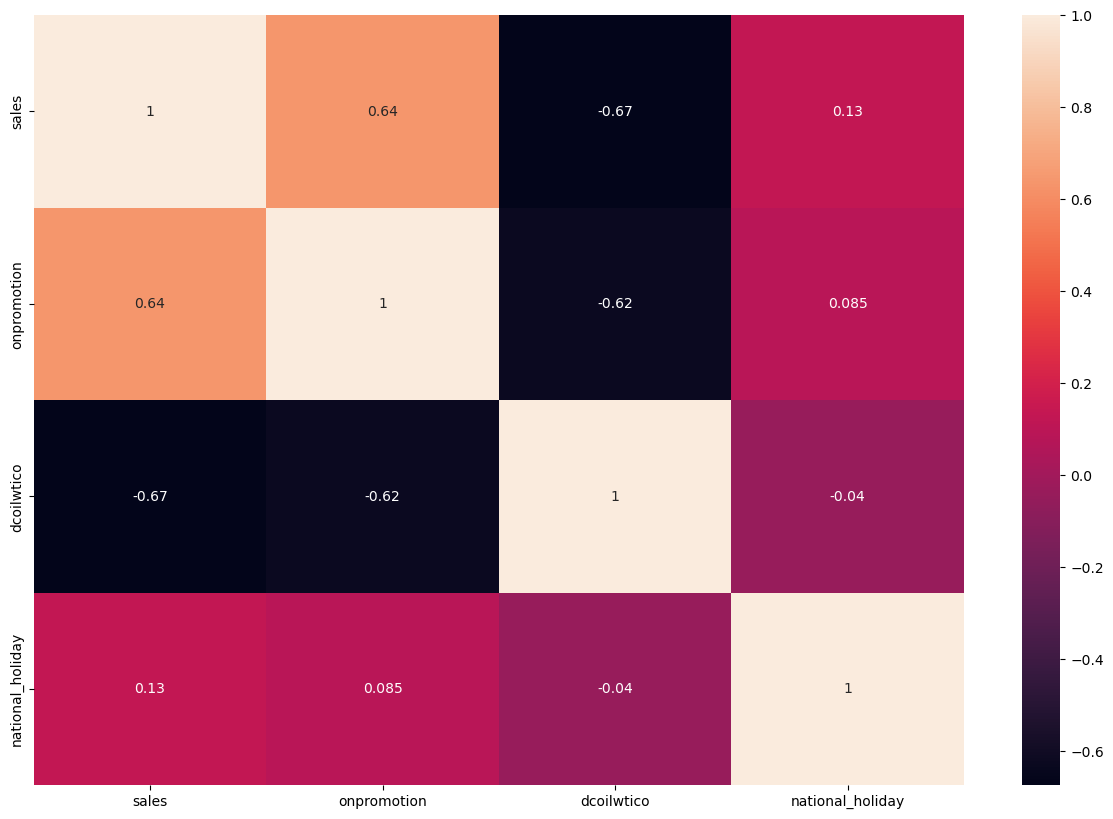

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data = daily_sales.corr(),annot= True)


In [46]:
one_month = daily_sales[(daily_sales['date'] >= '2015-08-01') & (daily_sales['date'] <= '2015-08-31')]

In [47]:
one_month.head()

,date,sales,onpromotion,dcoilwtico,national_holiday
940,2015-08-01,523221.698,0.819,45.25,0.0
941,2015-08-02,518091.170,1.292,45.25,0.0
942,2015-08-03,409607.019,0.763,45.25,0.0
943,2015-08-04,373674.500,2.126,45.75,0.0
944,2015-08-05,354324.142,4.385,45.13,0.0


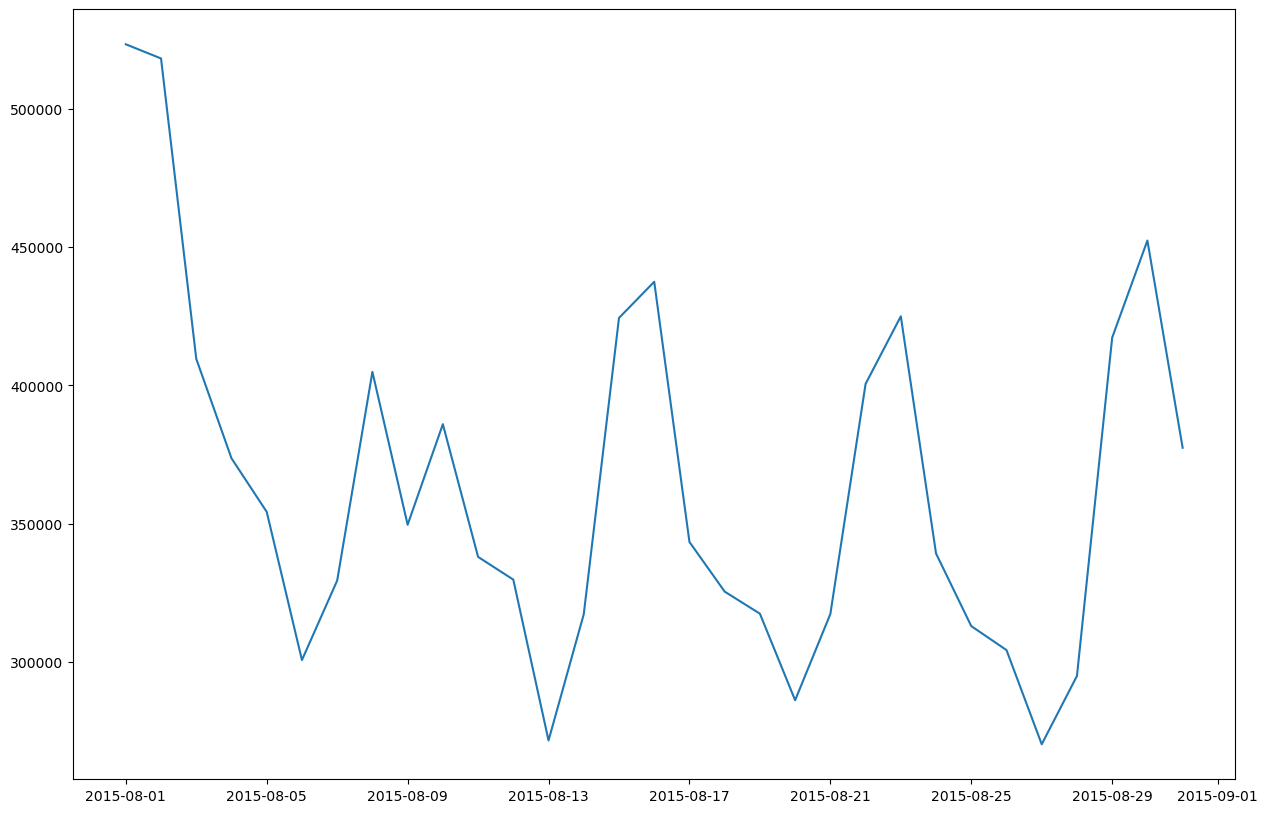

In [48]:
plt.figure(figsize=(15,10))
plt.plot(one_month['date'],one_month['sales'])

In [50]:
daily_sales['is_open'] = np.where(daily_sales['sales'] == 0, 1, 0)
daily_sales['day_of_week'] = daily_sales['date'].dt.day_of_week
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['year'] = daily_sales['date'].dt.year
daily_sales.set_index('date',inplace= True) 

In [52]:
train = daily_sales[daily_sales.index < '2016-08-15']
test = daily_sales[daily_sales.index >= '2016-08-15']

In [55]:
X_train = train.copy()
X_train.drop(columns= 'sales', inplace= True)
y_train = train['sales']
print(X_train.shape)
print(y_train.shape)


(1319, 7)
(1319,)


In [56]:
X_test = test.copy()
X_test.drop(columns= 'sales', inplace= True)
y_test = test['sales']
print(X_test.shape)
print(y_test.shape)

(365, 7)
(365,)


In [59]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


reg = xgb.XGBRegressor(n_estimators = 10000, early_stopping_rounds = 50 ,learning_rate = .001)
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

xgb_cv = GridSearchCV(reg, cv_params, scoring='neg_mean_squared_error', cv=5)

xgb_cv.fit(X_train, y_train, 
        eval_set = [(X_train, y_train),(X_test, y_test)], verbose = True )

[0]	validation_0-rmse:266178.81520	validation_1-rmse:387759.54961
[1]	validation_0-rmse:240624.58958	validation_1-rmse:358791.26862
[2]	validation_0-rmse:217173.32038	validation_1-rmse:328614.52578
[3]	validation_0-rmse:196765.19839	validation_1-rmse:301900.56379
[4]	validation_0-rmse:178049.84955	validation_1-rmse:282201.98194
[0]	validation_0-rmse:266521.15695	validation_1-rmse:387586.46710
[1]	validation_0-rmse:241985.58007	validation_1-rmse:358627.68237
[2]	validation_0-rmse:219604.86271	validation_1-rmse:328372.27768
[3]	validation_0-rmse:199154.07291	validation_1-rmse:301679.62356
[4]	validation_0-rmse:180719.09470	validation_1-rmse:282435.33431
[0]	validation_0-rmse:266963.41511	validation_1-rmse:386200.66797
[1]	validation_0-rmse:242622.20236	validation_1-rmse:356527.50165
[2]	validation_0-rmse:220550.49483	validation_1-rmse:327495.40613
[3]	validation_0-rmse:201143.33386	validation_1-rmse:300905.72314
[4]	validation_0-rmse:183537.72506	validation_1-rmse:282595.93353
[0]	valida

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=50,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.001, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=10000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             scoring='neg_mean_squared_error')

In [60]:
reg = xgb.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)
eval_set = [(X_train, y_train),(X_test, y_test)]
reg.fit(X_train, y_train, 
        eval_set = eval_set, verbose = 10)

[0]	validation_0-rmse:294460.55175	validation_1-rmse:419497.30641
[10]	validation_0-rmse:291629.70970	validation_1-rmse:415799.12156
[20]	validation_0-rmse:288827.43749	validation_1-rmse:412143.01329
[30]	validation_0-rmse:286053.40970	validation_1-rmse:408523.63246
[40]	validation_0-rmse:283307.40456	validation_1-rmse:404940.64655
[50]	validation_0-rmse:280589.29064	validation_1-rmse:401393.67588
[60]	validation_0-rmse:277898.68706	validation_1-rmse:397882.38565
[70]	validation_0-rmse:275235.14876	validation_1-rmse:394406.43477
[80]	validation_0-rmse:272598.39630	validation_1-rmse:390965.48811
[90]	validation_0-rmse:269988.33255	validation_1-rmse:387559.18281
[100]	validation_0-rmse:267404.54223	validation_1-rmse:384187.23055
[110]	validation_0-rmse:264846.90657	validation_1-rmse:380849.23672
[120]	validation_0-rmse:262315.11614	validation_1-rmse:377544.91123
[130]	validation_0-rmse:259808.91744	validation_1-rmse:374273.90906
[140]	validation_0-rmse:257327.98877	validation_1-rmse:3710

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index= reg.feature_names_in_,
             columns= ['importance'])
fi

,importance
onpromotion,0.386578
dcoilwtico,0.041366
national_holiday,0.069636
is_open,0.000000
day_of_week,0.275047
month,0.073540
year,0.153832


<Axes: title={'center': 'feature importance'}>

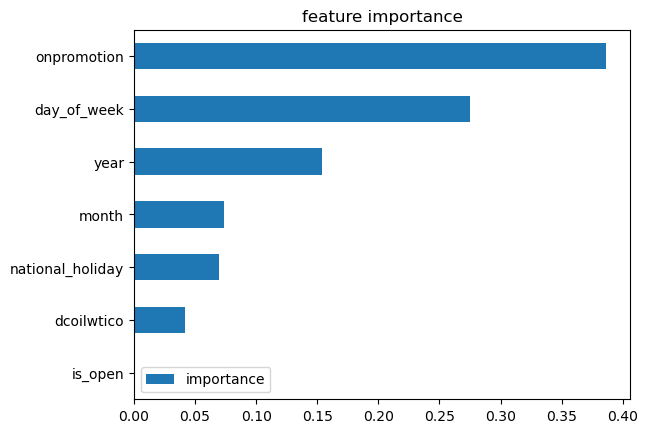

In [62]:
fi.sort_values('importance').plot(kind= 'barh', title = 'feature importance')

In [64]:
test['prediction'] = reg.predict(X_test)

C:\Users\bcspr\AppData\Local\Temp\ipykernel_21548\2903689382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [65]:
test.head()

,sales,onpromotion,dcoilwtico,national_holiday,is_open,day_of_week,month,year,prediction
date,,,,,,,,,
2016-08-15,375975.299,3.752,45.72,0.0,0,0,8,2016,347298.03125
2016-08-16,369860.785,5.122,46.57,0.0,0,1,8,2016,347147.15625
2016-08-17,362580.557,7.341,46.81,0.0,0,2,8,2016,347819.40625
2016-08-18,301841.003,3.682,48.20,0.0,0,3,8,2016,311575.43750
2016-08-19,334420.362,5.991,48.48,0.0,0,4,8,2016,324862.56250


In [67]:
daily_sales = daily_sales.merge(test[['prediction']], how= 'left', left_index= True, right_index= True)
daily_sales.head()

,sales,onpromotion,dcoilwtico,national_holiday,is_open,day_of_week,month,year,prediction_x,prediction_y
date,,,,,,,,,,
2013-01-01,2511.619,0.0,93.14,1.0,0,1,1,2013,NaN,NaN
2013-01-02,218693.044,0.0,93.14,0.0,0,2,1,2013,NaN,NaN
2013-01-03,170227.868,0.0,92.97,0.0,0,3,1,2013,NaN,NaN
2013-01-04,163540.909,0.0,93.12,0.0,0,4,1,2013,NaN,NaN
2013-01-05,211890.750,0.0,93.20,1.0,0,5,1,2013,NaN,NaN


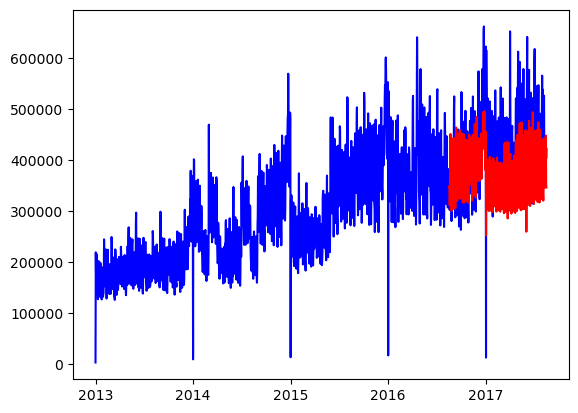

In [68]:
fig, ax = plt.subplots()
ax.plot(daily_sales.index,daily_sales['sales'],color = 'blue')
ax.plot(daily_sales.index,daily_sales['prediction_y'], color = 'red' )

In [69]:
start_date = '2017-02-01'
end_date = '2017-02-28'
One_month_pred = daily_sales[(daily_sales.index >= start_date ) & (daily_sales.index <= end_date)]

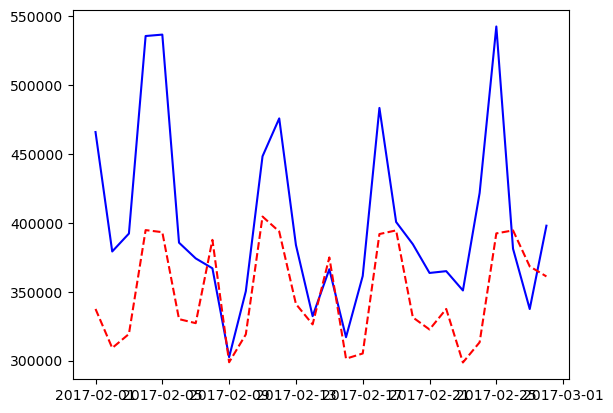

In [70]:
fig, ax = plt.subplots()
ax.plot(One_month_pred.index,One_month_pred['sales'],color = 'blue')
ax.plot(One_month_pred.index,One_month_pred['prediction_y'], color = 'red', linestyle = '--' )